# Pandas Data Analysis Portfolio Project

In [ ]:
#See Read.me File for written analysis.

In [28]:
#import Dependecies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path
import seaborn as sns

#Assign Variables to data files for processing

claims_data_load = Path("Resources/claims_combined_dataset - combined_table.csv")

#Read csv

claims_data = pd.read_csv(claims_data_load)
#Preview Data
claims_data.head()

,customer_policy_number,months_as_customer,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,age,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,total_claim_amount,injury_claim,property_claim,auto_make,auto_year,vehicle_claim
0,388671,140,OH,2000,1554.86,FEMALE,JD,armed-forces,wife,31,...,2,1,YES,1,6120,680,680,Honda,2002,4760
1,390381,190,OH,2000,965.21,FEMALE,JD,exec-managerial,other-relative,40,...,10,1,?,2,6300,630,630,Nissan,2001,5040
2,159243,64,IL,2000,1681.01,MALE,JD,protective-serv,own-child,30,...,16,1,NO,2,4900,490,1470,Jeep,2015,2940
3,774895,17,IL,1000,840.95,FEMALE,JD,adm-clerical,unmarried,39,...,9,1,?,2,3440,430,430,Suburu,2002,2580
4,159768,85,IN,500,1259.02,FEMALE,JD,tech-support,unmarried,25,...,8,1,NO,2,5640,940,940,Nissan,2005,3760


# Data Cleaning

In [ ]:
#Since the Big Query Sandbox doesn't allow Update commands to Drop Columns, I will drop the accident ID column here.
del claims_data["accident_policy_number"]

In [29]:
#Here I check the dataset for missing values.
for col in claims_data.columns:
    num_missing = np.mean(claims_data[col].isnull())
    print('{} - {}'.format(col,num_missing))
    


customer_policy_number - 0.0
months_as_customer - 0.0
policy_state - 0.0
policy_deductable - 0.0
policy_annual_premium - 0.0
insured_sex - 0.0
insured_education_level - 0.0
insured_occupation - 0.0
insured_relationship - 0.0
age - 0.0
accident_policy_number - 0.0
incident_type - 0.0
collision_type - 0.0
incident_severity - 0.0
incident_state - 0.0
incident_hour_of_the_day - 0.0
number_of_vehicles_involved - 0.0
property_damage - 0.0
bodily_injuries - 0.0
total_claim_amount - 0.0
injury_claim - 0.0
property_claim - 0.0
auto_make - 0.0
auto_year - 0.0
vehicle_claim - 0.0


In [ ]:
#The results show no missing values.

In [4]:
#Here is a look at Data Types for columns.
claims_data.dtypes

customer_policy_number           int64
months_as_customer               int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
age                              int64
incident_type                   object
collision_type                  object
incident_severity               object
incident_state                  object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
auto_make                       object
auto_year                        int64
vehicle_claim                    int64
dtype: object

In [5]:
#Data Types look good.

In [30]:
#I will now set the customer policy number as the DataFrames index.
claims_data.set_index("customer_policy_number")

#I wanted to look through the columns with an object data type, to see what values are present in each column.
#Instead of writing a for loop, I decided to do this manually one by one so I could easily read through the values
#in each column. I am checking to see if their are values I need to replace.
claims_data["policy_state"].unique()  # all good

claims_data["insured_sex"].unique()  # all good
 
claims_data["insured_education_level"].unique() # all set

claims_data["insured_occupation"].unique() #looks good

claims_data["insured_relationship"].unique() #looks good

claims_data["property_damage"].unique() #will replace '?' in the next step with 'Unknown' for clarity

claims_data["auto_make"].unique() #looks good

claims_data["incident_type"].unique() #looks good

claims_data["collision_type"].unique() # replace '?' with 'Unknown'

claims_data["incident_severity"].unique() #looks good

claims_data["incident_state"].unique() # looks good

array(['WV', 'SC', 'NY', 'NC', 'PA', 'VA', 'OH'], dtype=object)

In [7]:
#I will now find and replace all '?' in property damage and collision_type column with Unknown.
claims_data['property_damage'] = claims_data['property_damage'].replace('?','Unknown')

claims_data['collision_type'] = claims_data['collision_type'].replace('?','Unknown')

In [8]:
#I am now looking for duplicate customer_policy_numbers and will return their index in an f statement if duplicates exist.
duplicates = claims_data.index.duplicated(keep=False) 
if duplicates.any():
    print(f'duplicate found at index{duplicates.index}')
    
else:
    print('There are no duplicate customer_policies')

There are no duplicate customer_policies


# Data Analysis

### Summary Statistics

In [9]:
# Here is an example of a table of average values created by grouping the dataset based on auto_make. 
#This could be used to analyze the auto_make data to determine if there are any trends related to auto_make type.

In [10]:
#I use .groupby to group the table values based on auto_make.
make_df = claims_data.groupby(["auto_make"]).mean()

#Here I use the .drop() command to clean up the resulting data set.
cleaned_make_df = make_df.drop(columns = ['customer_policy_number','months_as_customer','policy_deductable','policy_annual_premium','age','incident_hour_of_the_day'])

#Here I preview the newly created grouped dataset.
cleaned_make_df.head()

/var/folders/qn/_ggx04zx5hn5grglx40xmqj80000gn/T/ipykernel_83840/1538080992.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  make_df = claims_data.groupby(["auto_make"]).mean()


,number_of_vehicles_involved,bodily_injuries,total_claim_amount,injury_claim,property_claim,auto_year,vehicle_claim
auto_make,,,,,,,
Accura,1.656250,0.937500,52326.875000,7295.312500,6675.937500,2004.718750,38355.625000
Audi,2.058824,0.941176,53411.764706,7988.529412,7701.764706,2004.529412,37721.470588
BMW,1.800000,1.000000,55717.428571,9028.571429,7447.714286,2004.714286,39241.142857
Chevrolet,2.000000,0.945946,57039.729730,8202.432432,7617.027027,2006.351351,41220.270270
Dodge,2.333333,0.916667,59462.222222,8045.555556,8826.111111,2004.361111,42590.555556


In [38]:
#Here I am reformatting make_df after using the mean() aggregate function.
#I will round several columns to make the data more readible.
for col in make_df.columns:
    make_df[col] = round(make_df[col],2)

#Here I return the auto year column to 'int64' format.
make_df["auto_year"] = make_df["auto_year"].astype('int64')

#Here I delete the customer policy number column as it is not useful in my analysis. I will then comment it out so I can run my code more than once.
#del make_df["customer_policy_number"]

# def format_as_currency(value):
#     return '${:.2f}'.format(float(value))
make_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,age,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,total_claim_amount,injury_claim,property_claim,auto_year,vehicle_claim
auto_make,,,,,,,,,,,,
Accura,195.91,1234.38,1286.11,38.72,9.50,1.66,0.94,52326.88,7295.31,6675.94,2004,38355.62
Audi,169.76,1352.94,1263.98,36.88,12.56,2.06,0.94,53411.76,7988.53,7701.76,2004,37721.47
BMW,198.94,1185.71,1241.71,39.11,11.17,1.80,1.00,55717.43,9028.57,7447.71,2004,39241.14
Chevrolet,209.35,972.97,1252.67,39.86,11.76,2.00,0.95,57039.73,8202.43,7617.03,2006,41220.27
Dodge,158.03,1152.78,1252.31,37.08,12.22,2.33,0.92,59462.22,8045.56,8826.11,2004,42590.56


In [32]:
# Here is an example of a table of summarys statistics for the total_claim_amount.
sum_tab = claims_data["total_claim_amount"].describe()
sum_tab

count       500.000000
mean      52934.420000
std       25861.634351
min         100.000000
25%       42450.000000
50%       59020.000000
75%       69842.500000
max      112320.000000
Name: total_claim_amount, dtype: float64

In [36]:
# Here I will add additional statistics to this table to make it more detailed.
sum_tab["median"] =np.median(claims_data["total_claim_amount"])
sum_tab["variance"] = claims_data["total_claim_amount"].var()
sum_tab["variance"] = claims_data["total_claim_amount"].sem()
#Here is a preview summary table with added values, rounded to the hundreths place.
sum_tab =round(sum_tab,2)
sum_tab

count          500.00
mean         52934.42
std          25861.63
min            100.00
25%          42450.00
50%          59020.00
75%          69842.50
max         112320.00
median       59020.00
variance      1156.57
Name: total_claim_amount, dtype: float64

In [ ]:
#This information could be used to determine which total_claim_amounts are outliers, how far a certain
#claim_amount is from the mean, median, minimum, or maximum value of total claim amounts.

# Bar plots of Categorical Variables of interest Vs Total Claim Amount

In [19]:
#I wanted to better understand what the distribution is of the total claim amounts
#vs Gender, Insured Education Level, and Insured Occupation.

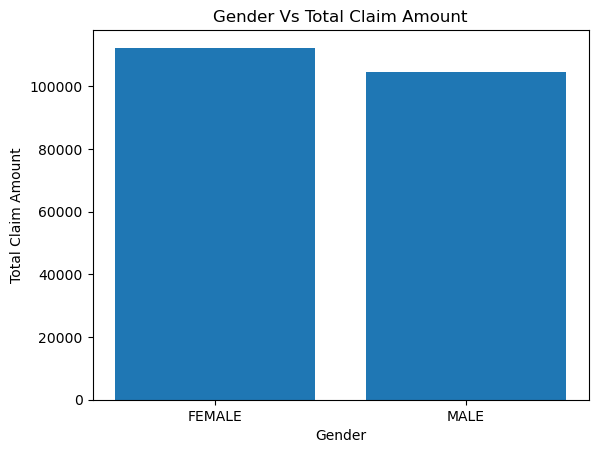

In [20]:
plt.bar(claims_data["insured_sex"],claims_data["total_claim_amount"])
plt.title("Gender Vs Total Claim Amount")
plt.xlabel("Gender")
plt.ylabel("Total Claim Amount")
plt.show()


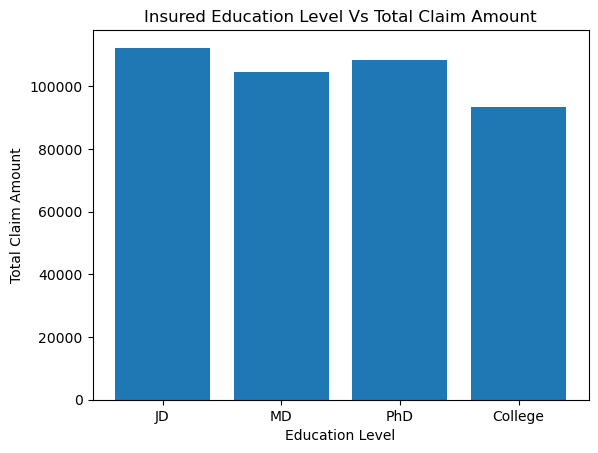

In [21]:
#I will now look at insured education versus total claim amount column using pyplot

plt.bar(claims_data["insured_education_level"],claims_data["total_claim_amount"])
plt.title("Insured Education Level Vs Total Claim Amount")
plt.xlabel("Education Level")
plt.ylabel("Total Claim Amount")
plt.show()


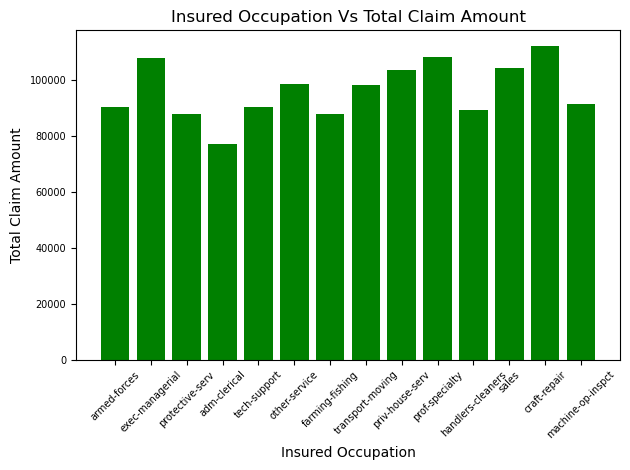

In [22]:
#Plotting Total Claim amount with occupation using pyplot.
plt.bar(claims_data["insured_occupation"],claims_data["total_claim_amount"],color = "green")
plt.title("Insured Occupation Vs Total Claim Amount")
plt.xlabel("Insured Occupation")
plt.ylabel("Total Claim Amount")
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


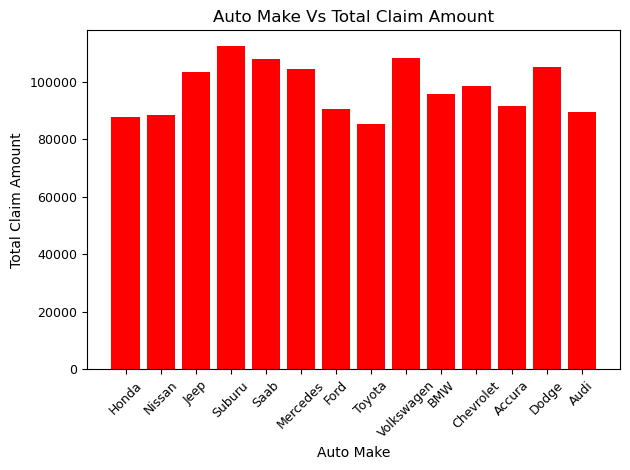

In [23]:
#Plotting total claim amount with auto make using pyplot.
plt.bar(claims_data["auto_make"],claims_data["total_claim_amount"],color = "red")
plt.title("Auto Make Vs Total Claim Amount")
plt.xlabel("Auto Make")
plt.ylabel("Total Claim Amount")
plt.tick_params(axis='both', which='major', labelsize=9)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Scatter Plots of Numerical Variables of Interest

Text(0, 0.5, 'Total Claim Amount')

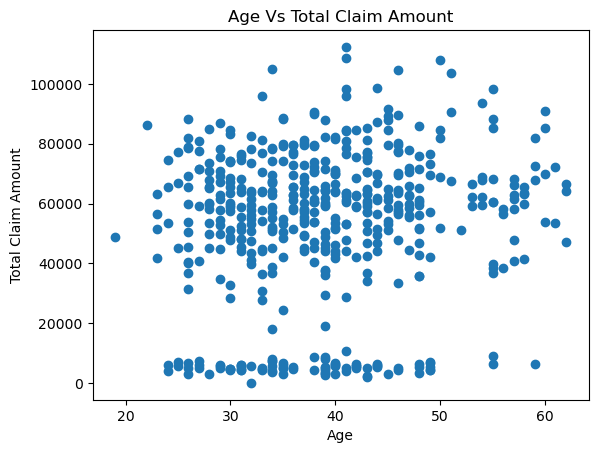

In [24]:
# I would like to see if there is any relationship between customer age, property_claim, injury claim and total_claim_amount.
plt.scatter(claims_data["age"],claims_data["total_claim_amount"])
plt.title("Age Vs Total Claim Amount")
plt.xlabel("Age")
plt.ylabel("Total Claim Amount")



In [ ]:
#It seems as though there is little correlation between Total Claim Amount and the Age of the customer

Text(0, 0.5, 'Total Claim Amount')

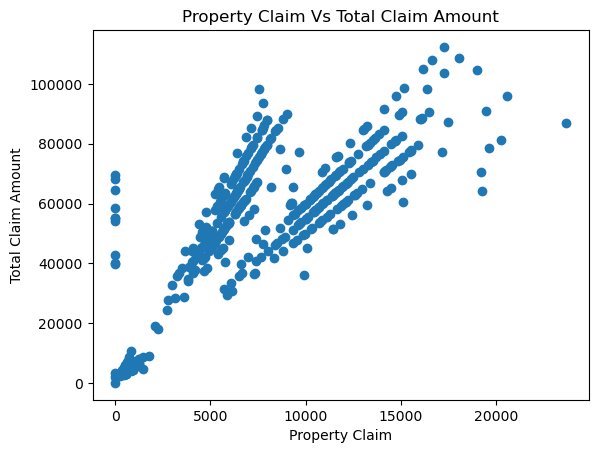

In [25]:
# I would like to see if there is any relationship between property damage amount and total_claim_amount
plt.scatter(claims_data["property_claim"],claims_data["total_claim_amount"])
plt.title("Property Claim Vs Total Claim Amount")
plt.xlabel("Property Claim")
plt.ylabel("Total Claim Amount")


In [ ]:
# It seems as though property damage claims have an impact on the total claim amount which makes sense.

Text(0, 0.5, 'Total Claim Amount')

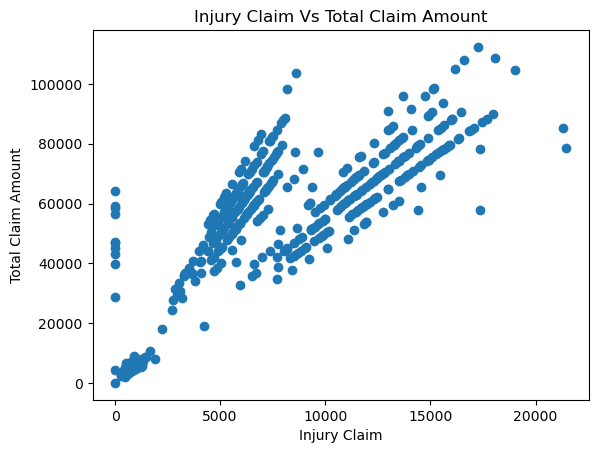

In [26]:
# I would like to see if there is any relationship between injury claim amount and total_claim_amount
plt.scatter(claims_data["injury_claim"],claims_data["total_claim_amount"])
plt.title("Injury Claim Vs Total Claim Amount")
plt.xlabel("Injury Claim")
plt.ylabel("Total Claim Amount")


In [ ]:
# It seems as though injury claims have an impact on the total claim amount which makes sense.

# Correlation Analysis

/var/folders/qn/_ggx04zx5hn5grglx40xmqj80000gn/T/ipykernel_83840/1150922516.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  claims_corr = claims_data.corr()


,customer_policy_number,months_as_customer,policy_deductable,policy_annual_premium,age,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,total_claim_amount,injury_claim,property_claim,auto_year,vehicle_claim
customer_policy_number,1.000000,0.089011,0.015697,-0.005774,0.067944,0.065210,0.036449,-0.000642,-0.054313,-0.069668,-0.027603,-0.005312,-0.050747
months_as_customer,0.089011,1.000000,0.034724,0.045602,0.909054,0.087910,0.075721,-0.029816,0.108759,0.093287,0.055827,0.019679,0.113703
policy_deductable,0.015697,0.034724,1.000000,-0.026234,0.047089,0.095586,0.084414,-0.025051,0.013000,0.036694,0.035219,0.012618,-0.000574
policy_annual_premium,-0.005774,0.045602,-0.026234,1.000000,0.067649,-0.005260,0.003889,-0.033965,-0.037192,-0.098949,-0.047112,-0.020926,-0.013874
age,0.067944,0.909054,0.047089,0.067649,1.000000,0.098447,0.084173,-0.043865,0.125552,0.100608,0.106265,0.011103,0.122280
incident_hour_of_the_day,0.065210,0.087910,0.095586,-0.005260,0.098447,1.000000,0.155110,-0.051608,0.205858,0.129211,0.199268,0.066340,0.203455
number_of_vehicles_involved,0.036449,0.075721,0.084414,0.003889,0.084173,0.155110,1.000000,0.012102,0.302697,0.236729,0.241186,0.019283,0.300248
bodily_injuries,-0.000642,-0.029816,-0.025051,-0.033965,-0.043865,-0.051608,0.012102,1.000000,0.023163,0.019786,0.002095,-0.001031,0.026780
total_claim_amount,-0.054313,0.108759,0.013000,-0.037192,0.125552,0.205858,0.302697,0.023163,1.000000,0.817298,0.794961,0.045313,0.983064
injury_claim,-0.069668,0.093287,0.036694,-0.098949,0.100608,0.129211,0.236729,0.019786,0.817298,1.000000,0.544566,0.054265,0.742909


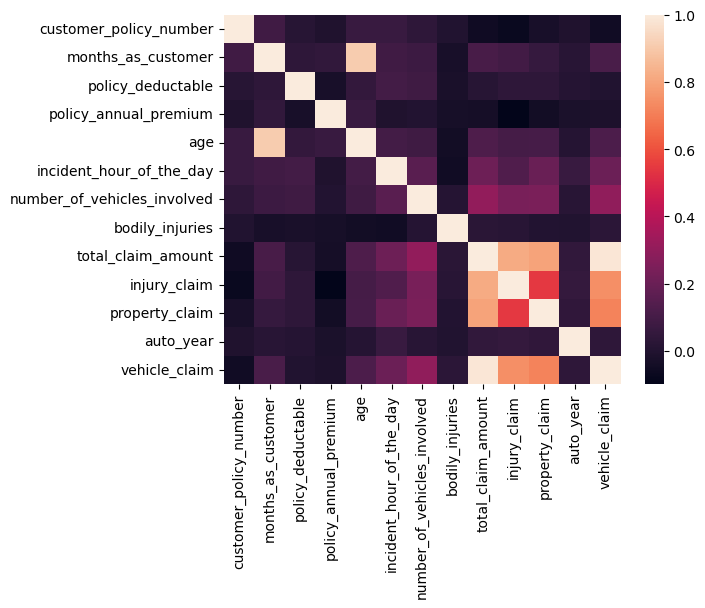

In [12]:
# I want to run a pearson correlation analysis to find relationships between numerical variables that I can dig further into
#using seaborn correlation heatmap.
#This line creates the correlation matrix.
claims_corr = claims_data.corr()

#Here I create the heatmap for the correlation matrix.
sns.heatmap(claims_corr)

claims_corr

In [13]:
#Here I will create a new Data Frame to turn non-numerical variables into categorical variables with a numeric value.
#This allows them to be added to a correlation matrix for analysis.

#I wanted to copy the dataset before I continued.
num_data = claims_data.copy()

#This for loop runs through each column with the data type object, and codes the column value with a numeric value.
for col_name in num_data.columns:
    if (num_data[col_name].dtype == 'object'):
        num_data[col_name] = num_data[col_name].astype('category')
        num_data[col_name] = num_data[col_name].cat.codes
        
num_data.head()

,customer_policy_number,months_as_customer,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,age,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,total_claim_amount,injury_claim,property_claim,auto_make,auto_year,vehicle_claim
0,388671,140,2,2000,1554.86,0,1,1,5,31,...,2,1,2,1,6120,680,680,6,2002,4760
1,390381,190,2,2000,965.21,0,1,3,2,40,...,10,1,1,2,6300,630,630,9,2001,5040
2,159243,64,0,2000,1681.01,1,1,10,3,30,...,16,1,0,2,4900,490,1470,7,2015,2940
3,774895,17,0,1000,840.95,0,1,0,4,39,...,9,1,1,2,3440,430,430,11,2002,2580
4,159768,85,1,500,1259.02,0,1,12,4,25,...,8,1,0,2,5640,940,940,9,2005,3760


In [14]:
#Lets look at the correlation matrix for the new numerical data set.
num_data.corr()

,customer_policy_number,months_as_customer,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_relationship,age,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,total_claim_amount,injury_claim,property_claim,auto_make,auto_year,vehicle_claim
customer_policy_number,1.000000,0.089011,0.060950,0.015697,-0.005774,0.011512,-0.080970,-0.038995,-0.022701,0.067944,...,0.065210,0.036449,-0.035340,-0.000642,-0.054313,-0.069668,-0.027603,0.029104,-0.005312,-0.050747
months_as_customer,0.089011,1.000000,0.046042,0.034724,0.045602,0.087043,0.049057,0.026658,0.028984,0.909054,...,0.087910,0.075721,-0.032653,-0.029816,0.108759,0.093287,0.055827,0.052556,0.019679,0.113703
policy_state,0.060950,0.046042,1.000000,-0.000594,0.034508,-0.011854,0.031835,-0.071769,-0.002039,0.043601,...,0.104243,-0.002186,-0.032627,0.008730,0.065306,0.018288,0.069202,0.030920,-0.007723,0.068996
policy_deductable,0.015697,0.034724,-0.000594,1.000000,-0.026234,0.007541,0.039445,-0.000459,-0.032326,0.047089,...,0.095586,0.084414,-0.022776,-0.025051,0.013000,0.036694,0.035219,-0.066501,0.012618,-0.000574
policy_annual_premium,-0.005774,0.045602,0.034508,-0.026234,1.000000,0.044200,0.030823,0.000692,-0.058870,0.067649,...,-0.005260,0.003889,0.007571,-0.033965,-0.037192,-0.098949,-0.047112,-0.005218,-0.020926,-0.013874
insured_sex,0.011512,0.087043,-0.011854,0.007541,0.044200,1.000000,-0.019664,0.002498,-0.000873,0.099535,...,0.025096,0.020349,0.011607,-0.026430,-0.000094,0.017241,0.000099,0.016282,-0.056352,-0.004718
insured_education_level,-0.080970,0.049057,0.031835,0.039445,0.030823,-0.019664,1.000000,-0.068387,-0.017595,0.039229,...,-0.059687,-0.201804,-0.035816,-0.050818,0.107362,0.079082,0.067384,0.022115,0.014169,0.112499
insured_occupation,-0.038995,0.026658,-0.071769,-0.000459,0.000692,0.002498,-0.068387,1.000000,0.003088,0.042655,...,0.038798,-0.015600,-0.050888,0.007981,-0.000030,0.036577,-0.000149,0.019918,-0.035773,-0.009680
insured_relationship,-0.022701,0.028984,-0.002039,-0.032326,-0.058870,-0.000873,-0.017595,0.003088,1.000000,0.045878,...,-0.025878,-0.040647,-0.037577,-0.011997,0.016580,0.035326,0.014290,-0.044755,0.044718,0.010250
age,0.067944,0.909054,0.043601,0.047089,0.067649,0.099535,0.039229,0.042655,0.045878,1.000000,...,0.098447,0.084173,-0.049862,-0.043865,0.125552,0.100608,0.106265,0.032652,0.011103,0.122280


In [15]:
# Lets make this easier to read by unstacking the above table.
corr_mat = num_data.corr()

corr_pairs = corr_mat.unstack()

corr_pairs

customer_policy_number  customer_policy_number    1.000000
                        months_as_customer        0.089011
                        policy_state              0.060950
                        policy_deductable         0.015697
                        policy_annual_premium    -0.005774
                                                    ...   
vehicle_claim           injury_claim              0.742909
                        property_claim            0.713803
                        auto_make                -0.063039
                        auto_year                 0.038309
                        vehicle_claim             1.000000
Length: 576, dtype: float64

In [16]:
#Here we sort the paired correlation values for easier viewing.
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

number_of_vehicles_involved  incident_type                 -0.891710
incident_type                number_of_vehicles_involved   -0.891710
collision_type               vehicle_claim                 -0.616293
vehicle_claim                collision_type                -0.616293
total_claim_amount           collision_type                -0.611108
                                                              ...   
                             total_claim_amount             1.000000
injury_claim                 injury_claim                   1.000000
property_claim               property_claim                 1.000000
collision_type               collision_type                 1.000000
vehicle_claim                vehicle_claim                  1.000000
Length: 576, dtype: float64

In [17]:
#Now I want to filter the above correlation pairs to show pairs that have a correlation coefficients greater than 0.5.
high_corr =sorted_pairs[(sorted_pairs >0.5)]

high_corr

injury_claim                 property_claim                 0.544566
property_claim               injury_claim                   0.544566
vehicle_claim                property_claim                 0.713803
property_claim               vehicle_claim                  0.713803
vehicle_claim                injury_claim                   0.742909
injury_claim                 vehicle_claim                  0.742909
total_claim_amount           property_claim                 0.794961
property_claim               total_claim_amount             0.794961
injury_claim                 total_claim_amount             0.817298
total_claim_amount           injury_claim                   0.817298
age                          months_as_customer             0.909054
months_as_customer           age                            0.909054
total_claim_amount           vehicle_claim                  0.983064
vehicle_claim                total_claim_amount             0.983064
customer_policy_number       custo

In [18]:
## There are no real surprises here. All of the injury, property, and vehicle claim informations should correlate to
# the total claim amount, and age should correlate to the policy duration of a customer.


#Please read the .Readme file for a written summary of my analysis.